In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
##Feature Engineering

In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
pd.concat([X,gender,geography],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [ ]:
##Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [22]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [50]:
classifier=Sequential()
##Adding input layer
classifier.add(Dense(units=11,activation='relu'))
##Adding 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))
##Adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=1,activation='sigmoid'))



In [51]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [53]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.5442 - accuracy: 0.7824 - val_loss: 0.4753 - val_accuracy: 0.7910
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4833 - accuracy: 0.7959 - val_loss: 0.4560 - val_accuracy: 0.7914
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4602 - accuracy: 0.8026 - val_loss: 0.4446 - val_accuracy: 0.7970
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4510 - accuracy: 0.8095 - val_loss: 0.4326 - val_accuracy: 0.8167
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.8119 - val_loss: 0.4235 - val_accuracy: 0.8239
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4279 - accuracy: 0.8145 - val_loss: 0.4143 - val_accuracy: 0.8251
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4217 - accuracy: 0.8201 - val_loss: 0.4069 - val_accuracy:

In [55]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

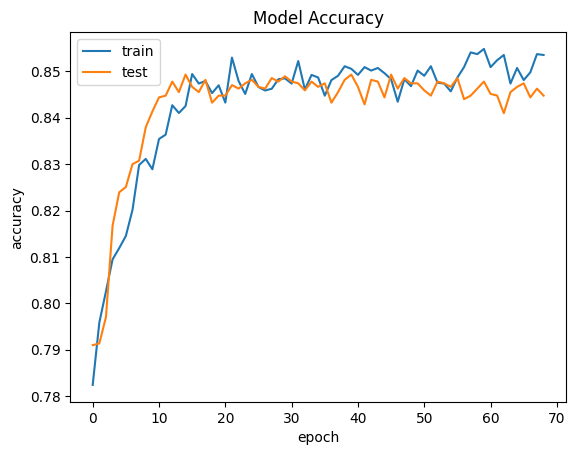

In [56]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [57]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[657, 950],
       [107, 286]])

In [60]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.4715

In [61]:
#get weights
classifier.get_weights()

[array([[-1.32421041e-02, -1.92605276e-02, -3.54682446e-01,
          8.04989636e-02, -7.57260807e-03,  3.80480081e-01,
         -3.99711654e-02, -1.09977044e-01, -7.57079646e-02,
          2.19538789e-02, -5.32016382e-02],
        [-6.23841107e-01,  2.22457737e-01, -2.56819606e-01,
          1.50327906e-01,  9.13576365e-01, -6.59211874e-01,
         -8.99374783e-01, -2.27666005e-01,  7.70745516e-01,
         -2.43184775e-01,  3.82111669e-01],
        [-4.10482436e-01,  6.27733096e-02, -2.01462671e-01,
         -2.00347081e-01, -1.48341656e-01, -3.17538530e-01,
         -1.42730206e-01,  2.03428164e-01,  3.95289622e-04,
         -5.27868383e-02, -6.46372698e-03],
        [-1.65604755e-01,  4.02822733e-01,  2.74067104e-01,
          2.07514003e-01, -1.26875773e-01,  9.54762325e-02,
          4.23546165e-01,  1.73347861e-01,  4.76054177e-02,
         -5.26243329e-01, -5.69448397e-02],
        [ 1.96099505e-01,  1.07659805e+00,  1.17390245e-01,
          1.07601154e+00, -3.18794519e-01,  